In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp
import os

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.dpi"] = 120
pd.options.display.max_columns = 1000

In [3]:
os.chdir("../../core")
import GT_helper_functions as hf
import GT_load_data as data

In [4]:
base_dir = "../../Outcome Measurement Data/MULTI/"

In [5]:
gbd17 = pd.read_csv("../../Outcome Measurement Data/MULTI/GBD-2017/IHME-GBD_2017_DATA-3f789f48-1.csv")

In [6]:
gbd17.columns

Index(['measure', 'location', 'sex', 'age', 'cause', 'metric', 'year', 'val',
       'upper', 'lower'],
      dtype='object')

In [7]:
#gbd17.age.value_counts()
# All ages :
allages = ["Under 5", "5-14 years", "15-49 years", "50-69 years", "70+ years"]
countries = ["Guatemala", "El Salvador", "Mexico", "Honduras"]


In [8]:
gbdCounts = gbd17[(gbd17.metric== "Number") & 
      (gbd17.location.isin(countries)) &
      (gbd17.age.isin(allages))]\
    .groupby(["cause", "year", "location", "measure"]).agg({
            "val": "sum", "upper": "sum", "lower": "sum"
        })

In [9]:
gbd15_17pop = pd.read_csv("../../Outcome Measurement Data/MULTI/GBD-2017/IHME_GBD_2017_POP_2015_2017_Y2018M11D08.CSV")
gbd10_14pop = pd.read_csv("../../Outcome Measurement Data/MULTI/GBD-2017/IHME_GBD_2017_POP_2010_2014_Y2018M11D08.CSV")
gbd05_09pop = pd.read_csv("../../Outcome Measurement Data/MULTI/GBD-2017/IHME_GBD_2017_POP_2005_2009_Y2018M11D08.CSV")
gbd00_04pop = pd.read_csv("../../Outcome Measurement Data/MULTI/GBD-2017/IHME_GBD_2017_POP_2000_2004_Y2018M11D08.CSV")

In [10]:
gbd15_17pop.sex_name.value_counts()

Male      187131
Female    187131
Both      187131
Name: sex_name, dtype: int64

In [11]:
def aggPop(dataframe):
    return dataframe[dataframe.age_group_name.isin(allages) & 
                (dataframe.location_name.isin(countries)) &
                (dataframe.sex_name == "Both")
               ].groupby(["year_id","location_name"]).agg({
        "val": "sum",
        "upper": "sum",
        "lower": "sum"
    })

In [12]:
pops = pd.concat([
    aggPop(gbd15_17pop),
    aggPop(gbd10_14pop),
    aggPop(gbd05_09pop),
    aggPop(gbd00_04pop)
          ]).sort_index()

In [13]:
pops/1000000

val       upper       lower
year_id location_name                                    
2000    El Salvador      5.793085    6.476183    5.176984
        Guatemala       10.939444   11.830101   10.105576
        Honduras         6.191807    6.686969    5.735379
        Mexico         101.772183  108.966802   94.943589
2001    El Salvador      5.825302    6.430364    5.233423
        Guatemala       11.287420   12.147300   10.461622
        Honduras         6.354991    6.769508    5.933975
        Mexico         103.195210  110.793584   95.723630
2002    El Salvador      5.851802    6.415987    5.263337
        Guatemala       11.641467   12.455436   10.831041
        Honduras         6.521401    7.001093    6.019106
        Mexico         104.633800  112.864889   96.233251
2003    El Salvador      5.873836    6.456764    5.332769
        Guatemala       11.997784   12.952353   11.108083
        Honduras         6.690696    7.204573    6.135836
        Mexico         106.079350  115.342611   96.400038
2004    El Salvador      5.891282    6.421787    5.375646
        Guatemala       12.353070   13.286054   11.396751
        Honduras         6.863220    7.488027    6.278974
        Mexico         107.532079  118.805610   97.197421
2005    El Salvador      5.904942    6.385237    5.422801
        Guatemala       12.701209   13.735758   11.624897
        Honduras         7.039836    7.697645    6.357659
        Mexico         108.987399  119.042223   98.308509
2006    El Salvador      5.916352    6.342293    5.486850
        Guatemala       13.042118   14.298033   11.840615
        Honduras         7.220820    7.888737    6.514702
        Mexico         110.447283  121.324355  100.183878
2007    El Salvador      5.925742    6.334701    5.535280
        Guatemala       13.384705   14.825785   12.039738
...                           ...         ...         ...
2010    Honduras         7.996351    8.685365    7.316522
        Mexico         116.291537  123.907157  108.370612
2011    El Salvador      5.972433    6.512096    5.446120
        Guatemala       14.769342   16.731714   12.972148
        Honduras         8.202198    8.849860    7.548193
        Mexico         117.747267  126.111704  109.119376
2012    El Salvador      5.989046    6.581120    5.402258
        Guatemala       15.112472   17.063960   13.072357
        Honduras         8.410475    9.036155    7.775788
        Mexico         119.210778  128.351748  109.535631
2013    El Salvador      6.006565    6.650999    5.374469
        Guatemala       15.462846   17.703907   13.225918
        Honduras         8.621030    9.201224    8.038606
        Mexico         120.676016  130.035847  110.790826
2014    El Salvador      6.024527    6.725142    5.372742
        Guatemala       15.818529   18.149209   13.515887
        Honduras         8.835052    9.502517    8.111683
        Mexico         122.143326  134.028599  111.045305
2015    El Salvador      6.042670    6.772838    5.319162
        Guatemala       16.179641   18.549158   13.776331
        Honduras         9.051499    9.819413    8.295216
        Mexico         123.617062  135.942816  111.609671
2016    El Salvador      6.063388    6.840445    5.335883
        Guatemala       16.548244   19.135598   14.231574
        Honduras         9.272641   10.082914    8.422419
        Mexico         125.095853  138.475502  111.435691
2017    El Salvador      6.086947    6.829726    5.313317
        Guatemala       16.924208   19.634751   14.229894
        Honduras         9.498815   10.405007    8.568713
        Mexico         126.569720  141.467321  112.472304

[72 rows x 3 columns]

In [14]:
gbdCounts = gbdCounts.reset_index()

In [15]:
gbdCounts["cause2"] = gbdCounts.cause.map(lambda x: "TB" if "Tuberculosis" in x else "HIV" if "HIV" in x else "Malaria" if "Malaria" in x else "")
# This still is not taking in to account coinfection of hiv and tb.

In [16]:
summary = gbdCounts[gbdCounts.year >= 2000].groupby(["year", "cause2", "measure", "location"])\
    .apply(lambda x: 100000*x.val.sum()/pops.loc[(slice(x["year"].values[0], x["year"].values[0]), slice(x["location"].values[0], x["location"].values[0])), ].val.values[0])\
    .round(5).unstack(2)
gbdCounts.location
summary.to_csv("../../Outcome Measurement Data/MULTI/GBD-2017/summary.csv")

In [17]:
mlp.rcParams["figure.figsize"] = (8, 4)
mlp.rcParams["figure.dpi"] = 200
def tsPlot(disease, measure, prefix, ax = None):
    temp = summary.loc[(slice(2000,2017), slice(disease, disease)),measure].unstack(2)
    temp.columns = temp.columns.values
    temp.plot(ax = ax)
    plt.xlabel("")
    plt.ylabel(prefix + " rate x 100,000")
    #plt.xticks(range(0,18), range(2000,2018), rotation="90")


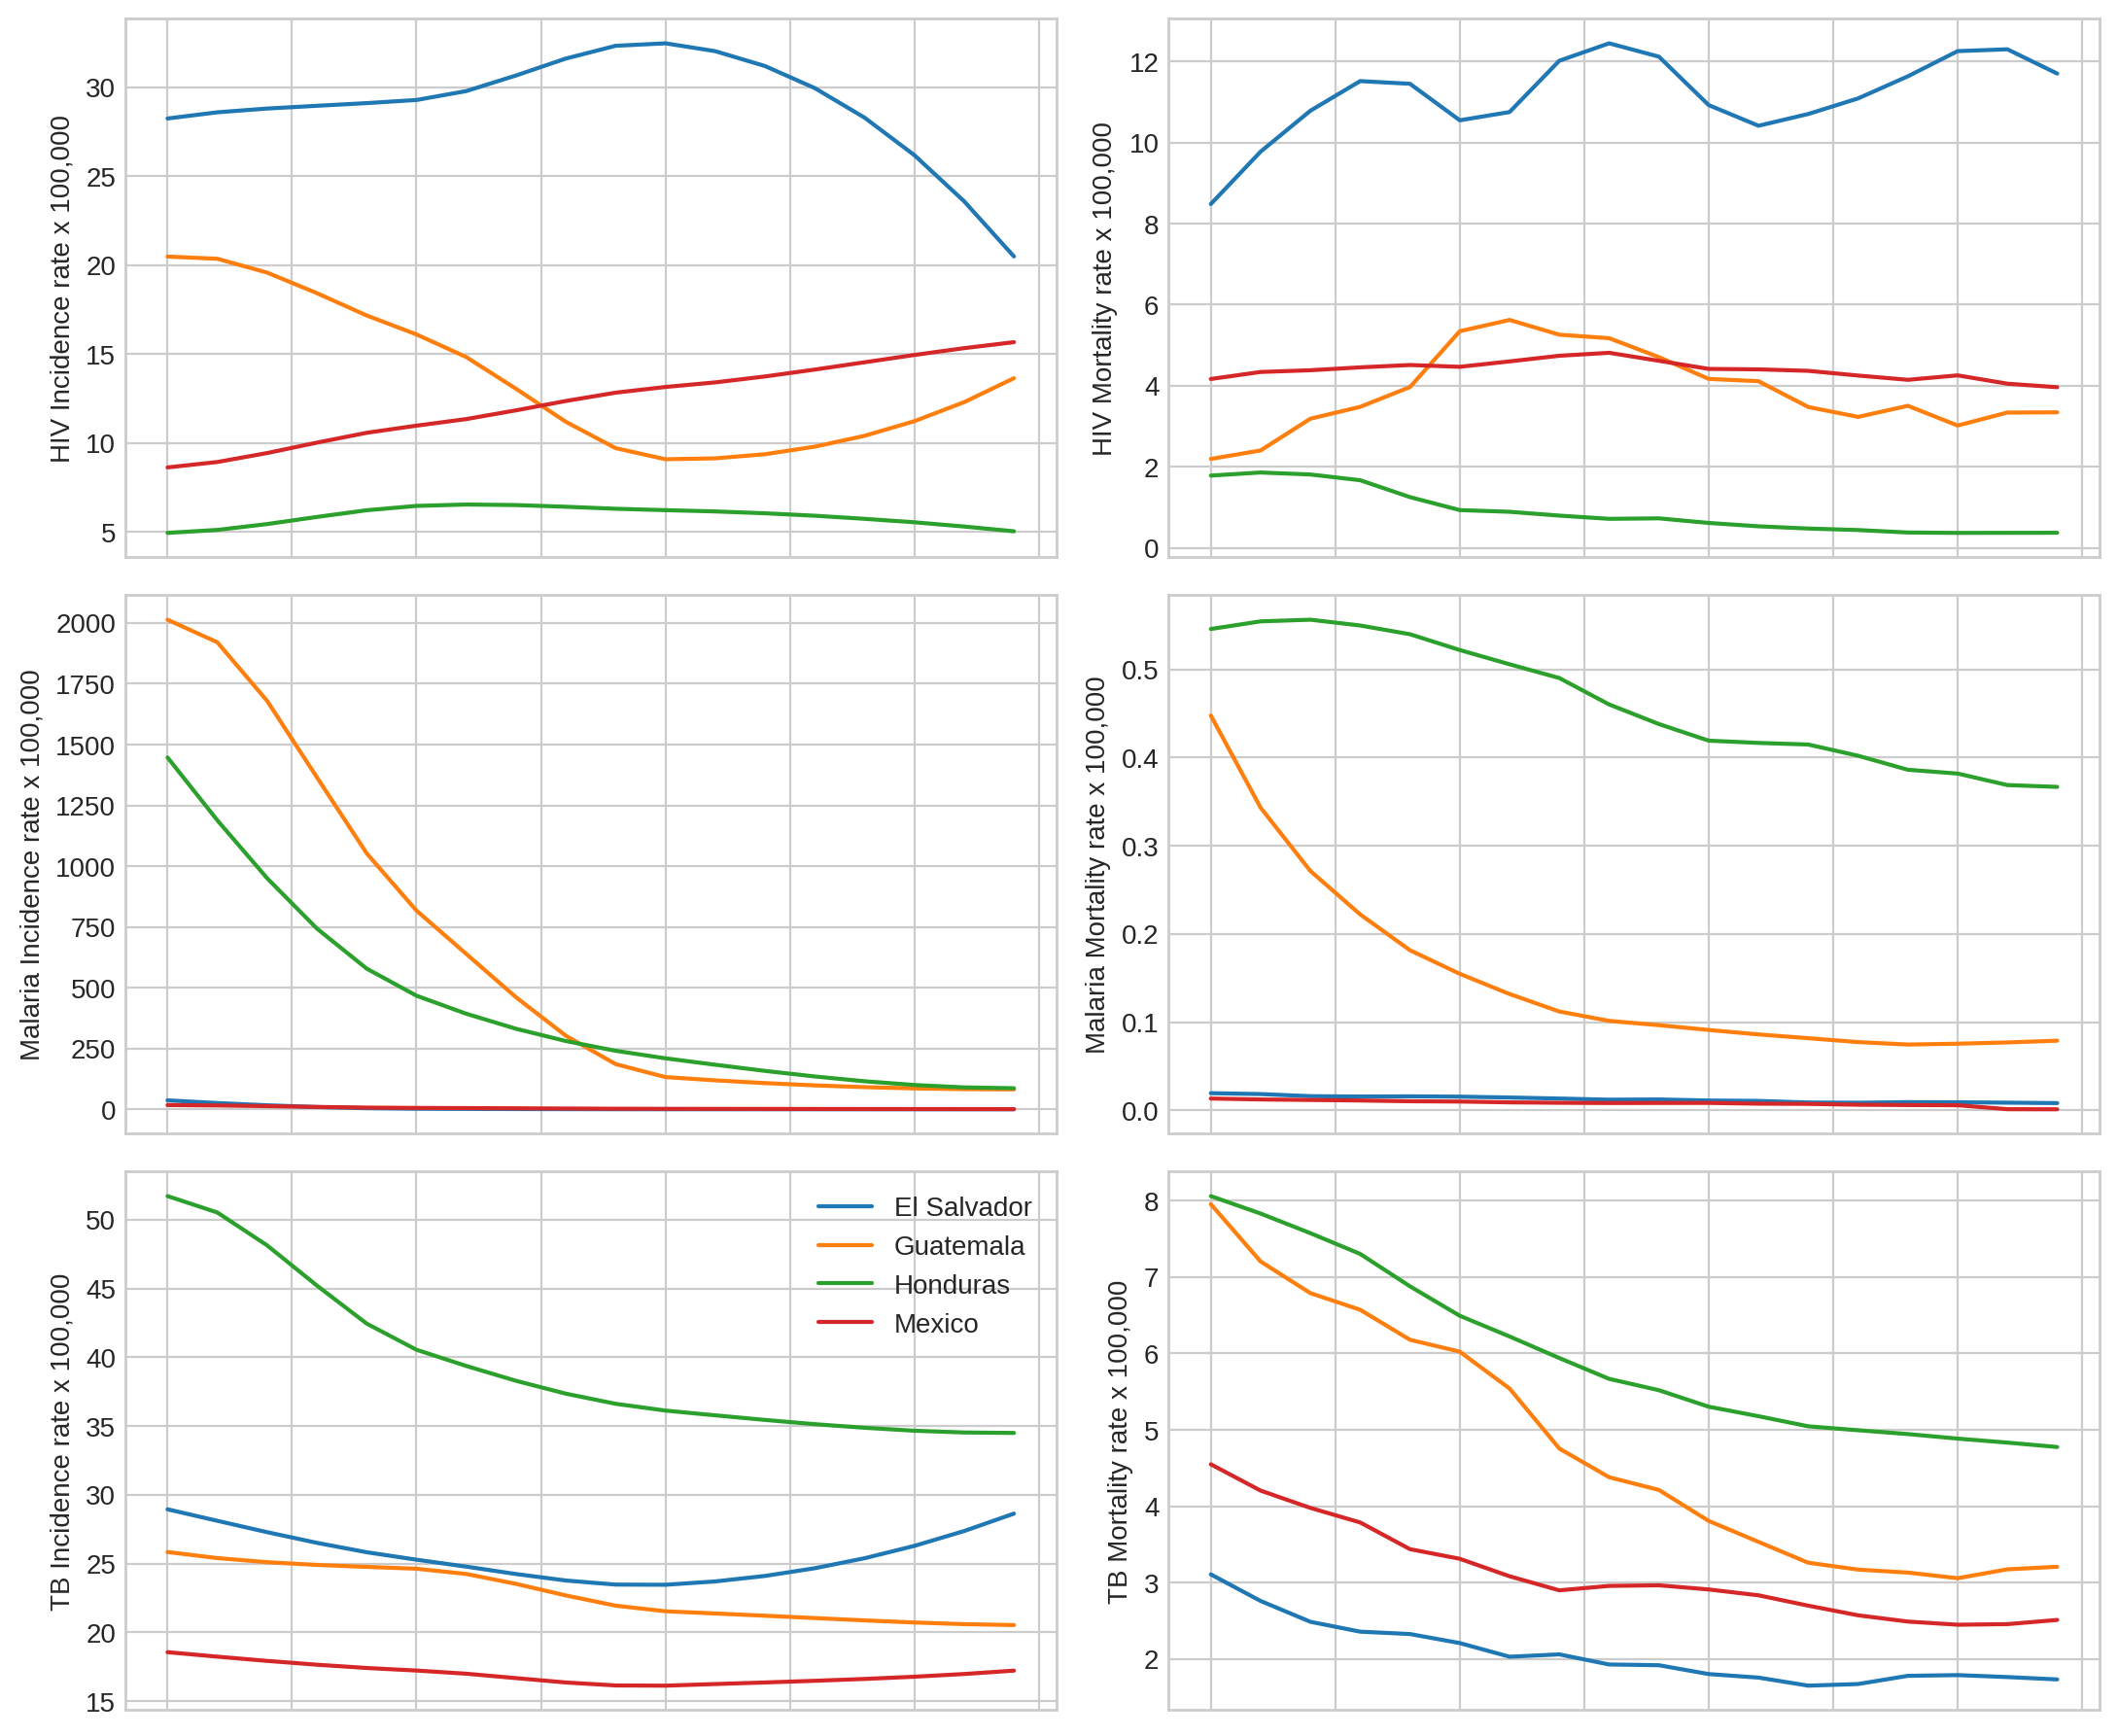

In [18]:
mlp.rcParams["figure.figsize"] = (11, 9)
ax = plt.subplot(3, 2, 1)
tsPlot("HIV", "Incidence", "HIV Incidence", ax)
plt.legend().remove()
ax = plt.subplot(3, 2, 2)
tsPlot("HIV", "Deaths", "HIV Mortality", ax)
plt.legend().remove()
ax = plt.subplot(3, 2, 3)
tsPlot("Malaria", "Incidence", "Malaria Incidence", ax)
plt.legend().remove()
ax = plt.subplot(3, 2, 4)
tsPlot("Malaria", "Deaths", "Malaria Mortality", ax)
plt.legend().remove()
ax = plt.subplot(3, 2, 5)
tsPlot("TB", "Incidence", "TB Incidence", ax)
ax = plt.subplot(3, 2, 6)
tsPlot("TB", "Deaths", "TB Mortality", ax)
plt.legend().remove()
plt.tight_layout()

In [19]:
summary.loc[(slice(2015,2017), slice(None)), ].unstack(1).round(2)

measure          Deaths               Incidence                Prevalence  \
cause2              HIV Malaria    TB       HIV Malaria     TB        HIV   
year location                                                               
2015 El Salvador  12.26    0.01  1.79     26.18    0.30  26.28     337.02   
     Guatemala     3.02    0.08  3.06     11.23   86.03  20.71     184.87   
     Honduras      0.37    0.38  4.88      5.55  100.11  34.65      81.31   
     Mexico        4.26    0.01  2.45     14.95    1.18  16.77     170.04   
2016 El Salvador  12.30    0.01  1.76     23.59    0.29  27.36     344.96   
     Guatemala     3.34    0.08  3.17     12.30   82.99  20.59     186.13   
     Honduras      0.37    0.37  4.83      5.31   90.21  34.53      83.56   
     Mexico        4.05    0.00  2.46     15.34    1.06  16.96     180.27   
2017 El Salvador  11.70    0.01  1.73     20.49    0.29  28.63     352.17   
     Guatemala     3.34    0.08  3.21     13.65   82.14  20.52     186.66   
     Honduras      0.37    0.37  4.77      5.04   86.81  34.49      85.62   
     Mexico        3.96    0.00  2.51     15.67    0.96  17.21     190.85   

measure                             
cause2           Malaria        TB  
year location                       
2015 El Salvador   12.67  23237.30  
     Guatemala    208.58  27280.81  
     Honduras     212.60  29809.63  
     Mexico         9.01  24041.16  
2016 El Salvador   12.49  22972.71  
     Guatemala    203.19  27060.04  
     Honduras     194.58  29515.27  
     Mexico         7.51  23789.96  
2017 El Salvador   12.41  22684.28  
     Guatemala    200.40  26817.23  
     Honduras     178.18  29205.39  
     Mexico         6.03  23509.74

In [20]:
gbdCounts[(gbdCounts.year==2016) & (gbdCounts.cause.map(lambda x: "Tuberculosis" in x)) & (gbdCounts.location == "El Salvador") &
          (gbdCounts.measure == "Incidence")].val.sum()

1658.8404063604567